In [2]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
bike = pd.read_csv('day.csv')
bike.info()

Data = bike[['cnt', 'temp']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data= Data.sample(n=50).reset_index()
# 데이터 개수가 적을때 쓸데없이 복잡한 모델을 만들어보려고
# 얼마나 과적화 되어버리는지
data.shape[0]

50

In [5]:
# Train-Test Split

N=data.shape[0] #행 개수 / data.shape[1] -> 열 

test= np.random.choice(np.arange(N), 20, replace=False)
#np.arrange(N)=50 -> [0,50) 중 20개 선택 

train_df = data[~data.index.isin(test)].copy() #가져온 데이터만 수정, 원본 유지 
test_df = data[data.index.isin(test)].copy()

print(train_df.shape, test_df.shape)

(30, 3) (20, 3)


In [6]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

In [8]:
# Design Matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [32]:
#수정 전 코드 
#오류 발생 이유: train에다가 모델을 fit하고 test는 검증하는 용도인데
#여기서는 test에서도 모델을 학습해서 
#실질적으로 train, test 코드가 동일 

degreee=list(range(1,15))
pr=LinearRegression()

train_log_mse=[]


for m in degreee :
    poly = PolynomialFeatures(degree=m)
    
    X_train_poly = poly.fit_transform(X_train) 
    #fit(): 정규화를 위해 mu, sigma 계산 , transform(): 정규화
    
    pr.fit(X_train_poly, y_train)
    
    y_train_poly_pred=pr.predict(X_train_poly)
    
    mse=mean_squared_error(y_train,y_train_poly_pred)
    train_log_mse.append(np.log(mse))

print(train_log_mse)


test_log_mse=[]

for m in degreee :
    poly = PolynomialFeatures(degree=m) 
    
    X_test_poly = poly.fit_transform(X_test) 
    
    pr.fit(X_test_poly, y_test) #####잘못된 포인트 
    
    y_test_poly_pred=pr.predict(X_test_poly)
    
    mse=mean_squared_error(y_test,y_test_poly_pred)
    test_log_mse.append(np.log(mse))

print(test_log_mse)

[14.331947308746964, 14.08574942098299, 13.93302678786095, 13.926414380211446, 13.77630660570694, 13.762690052559073, 13.469286616057866, 13.445515798599645, 13.428983526143664, 13.426784598348643, 13.296115849767263, 13.254105657307687, 13.229720060438323, 13.205727081979546]


In [9]:
#수정 후 코드
#for 문--> 루프 한번 돌리는 게 결국 모델을 한번 돌리는 거 

degreee=list(range(1,15))
pr=LinearRegression()

train_log_mse=[]
test_log_mse=[]


for m in degreee :
    poly = PolynomialFeatures(degree=m)
    
    #다항식으로 변형
    X_train_poly = poly.fit_transform(X_train) 
    X_test_poly = poly.fit_transform(X_test) 
    
    #train set으로 모델 fit
    pr.fit(X_train_poly, y_train) ####
    
    #fit한걸 바탕으로 예측 
    #여기서 test는 검증하는 용도로 
    y_train_poly_pred=pr.predict(X_train_poly)
    y_test_poly_pred=pr.predict(X_test_poly)
    
    train_mse=mean_squared_error(y_train,y_train_poly_pred)
    test_mse=mean_squared_error(y_test,y_test_poly_pred)
    
    train_log_mse.append(np.log(train_mse))
    test_log_mse.append(np.log(test_mse))
    
    
print(train_log_mse)
print(test_log_mse)

[14.559025439319221, 14.316181770569434, 14.312527589856195, 14.3067984584154, 14.237311199357453, 14.227088996847066, 14.226461281914466, 14.179410986828799, 14.179233855286997, 14.179198865697666, 14.093103749779736, 13.997544620114049, 13.939628791558746, 13.88449881761198]
[14.506866602499809, 14.324572520088882, 14.346552480367913, 14.413285022735794, 14.63377762273001, 14.711275596806315, 14.68279343290896, 14.52534936047292, 14.543263414506177, 14.547378814514373, 14.530233458176028, 16.70987159675958, 18.246027658495912, 19.681098991803335]


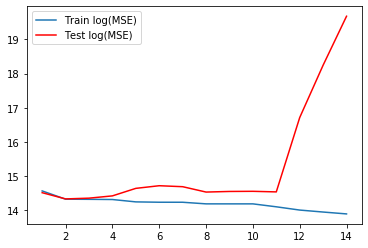

In [11]:
plt.plot(degreee, train_log_mse, label="Train log(MSE)")
plt.plot(degreee, test_log_mse, color="red",label="Test log(MSE)")
plt.legend()